# PHYS 341 Mechanics -- Ch. 1 HW Solutions

In [1]:
%matplotlib inline 
%config InlineBackend.figure_format='retina'

from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import numpy as np

from JSAnimation.IPython_display import display_animation
from matplotlib import animation

In [12]:
def draw_coordinate_axes(ax, origin=(0, 0), dimensions=2, size=1, fontsize=24, 
                         length=1, axis_label='', color='k', alpha=1):
    #Remove standard axes
    ax.set_axis_off()
    
    ax.set_xlim([-size, size])
    ax.set_ylim([-size, size])
    
    #add arrows
    ax.annotate(s='', xy=(origin[0], origin[1] + length), xytext=origin, 
                arrowprops=dict(facecolor=color, width=2, alpha=alpha))
    ax.annotate(s='', xy=(origin[0] + length, origin[1]), xytext=origin, 
                arrowprops=dict(facecolor=color, width=2, alpha=alpha))
      
    #Add the vector labels
    if(dimensions == 2):
        ax.text(origin[0] + length, origin[1], "$\\hat{x}%s$" % axis_label, fontsize=fontsize, color=color)
        ax.text(origin[0], origin[1] + length, "$\\hat{y}%s$" % axis_label, fontsize=fontsize, color=color)

    elif(dimensions == 3):
        ax.annotate(s='', xy=(origin[0] - length*np.cos(45.), origin[1] - length*np.sin(45.)), xytext=origin, 
                    arrowprops=dict(facecolor=color, width=2, alpha=alpha))
        
        ax.text(origin[0] + length, origin[1], "$\\hat{y}%s$" % axis_label, fontsize=fontsize, color=color)
        ax.text(origin[0], origin[1] + length, "$\\hat{z}%s$" % axis_label, fontsize=fontsize, color=color)
        ax.text(origin[0] - length*np.cos(45.) - 0.15, origin[1] - length*np.sin(45.) - 0.15, 
                "$\\hat{x}%s$" % axis_label, 
                fontsize=fontsize, color=color)


## 1.3

Eqns (1.6) and (1.7) say $\vec{r} \bullet \vec{s} = |\vec{r}| |\vec{s}| \cos \theta = \sum_{i} r_{\rm i} s_{\rm i}$, so <br>

$\vec{r} \bullet \vec{r} = |\vec{r}| |\vec{r}| \cos(0) = r^2 = \sum_{i} r_{\rm i} r_{\rm i} = x^2 + y^2 + z^2.$

## 1.7

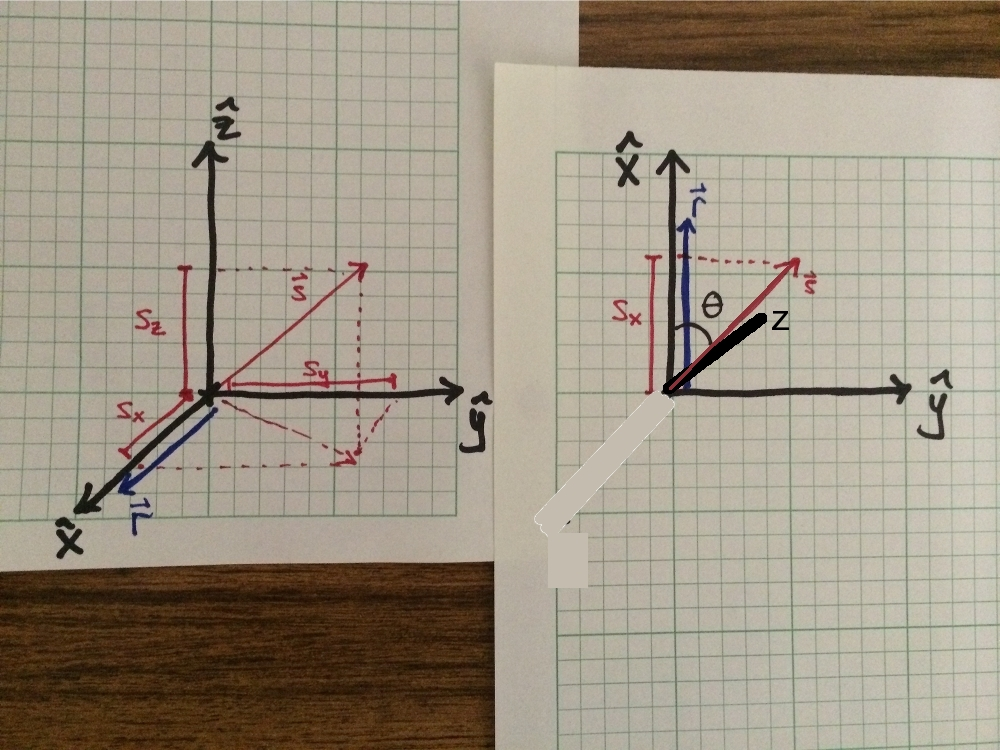

In [15]:
Image(filename='HW1_Fig1p7.jpg', width=600)

If we choose a coordinate system, $(x, y, z)$ such that $\hat{x}$ runs parallel to $\vec{r}$, then $\vec{r} = r \hat{x}$. $\vec{s}$ is some other vector with an arbitrary orientation relative to $\vec{r}$, however: $\vec{s} = s_{\rm x} \hat{x} + s_{\rm y} \hat{y} + s_{\rm z} \hat{z}$, and $|\vec{s}| = \sqrt{s_{\rm x}^2 + s_{\rm y}^2 + s_{\rm z}^2}$. The left figure above illustrates this geometry.

Using this definition, $\vec{r} \bullet \vec{s} = r\ s_{\rm x}$, so now we need to show that $s_{\rm x} = s\ \cos(\theta)$. Rotating the coordinate system in the left panel above a bit gives us the right panel. If $|\vec{s}|$ is the hypoteneuse of a right triangle and the adjacent of that triangle runs parallel to $\hat{x}$ and therefore to $\vec{r}$, then clearly $s_{\rm x} = s\ \cos(\theta)$. Thus $r\ s_{\rm x} = |\vec{r}|\ |\vec{s}| \cos(\theta)$. Choosing $\vec{r}$ to run parallel to either $\hat{y}$ or $\hat{z}$ wouldn't change this result at all. 

Also, having $\vec{r}$ run along none of the coordinate vectors (as is usually the case) wouldn't change the result either since we could always express the coordinate vectors themselves in terms of another coordinate system where one unit vector ran parallel to $\vec{r}$ (and the other two pointed in perpendicular directions). 

## 1.10

Taking $\vec{r}(t) = \hat{x}\ R \cos(\omega t) + \hat{y}\ R \sin(\omega t)$. You can see that the radial distance is a constant: $r = \sqrt{\vec{r} \bullet \vec{r}} = \sqrt{ \left[ \hat{x}\ R \cos(\omega t) + \hat{y}\ R \sin(\omega t) \right] \bullet \left[ \hat{x}\ R \cos(\omega t) + \hat{y}\ R \sin(\omega t) \right]} = \sqrt{ R^2 \left[ \cos(\omega t)^2 + \sin(\omega t)^2 \right] } = R$. The x and y components oscillate sinusoidally, $90^\circ$ out of phase with another with the x component equal to $R$ and the y projection equal zero at $t = 0$. Then $y$ increases and $x$ decreases as time goes forward -- that's <a href="https://en.wikipedia.org/wiki/Widdershins">counter-clockwise circular motion</a>. The animation below shows how circular motion looks projected onto the x- and y-axes.


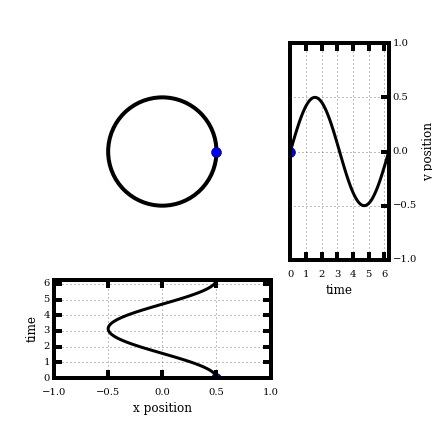
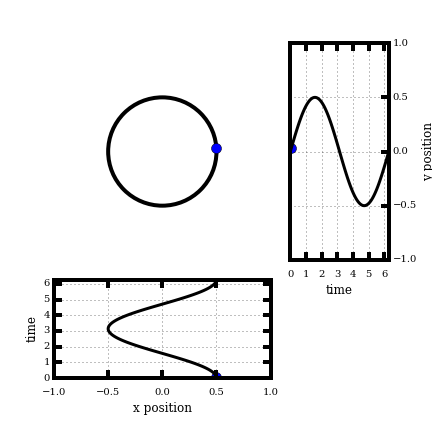
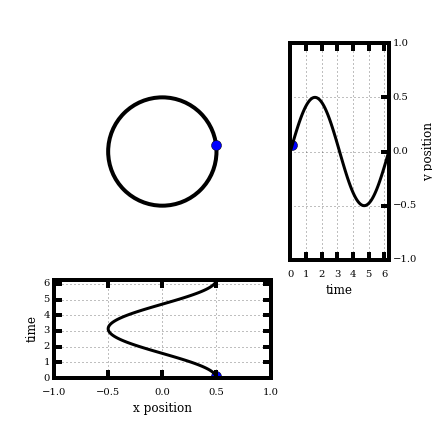
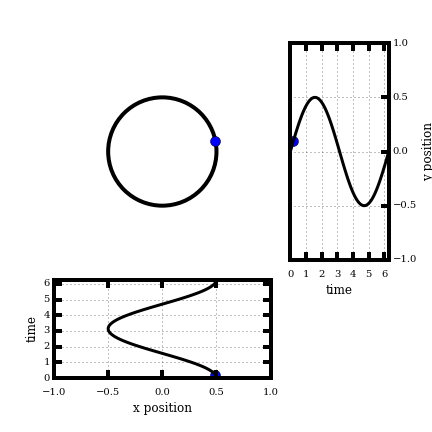
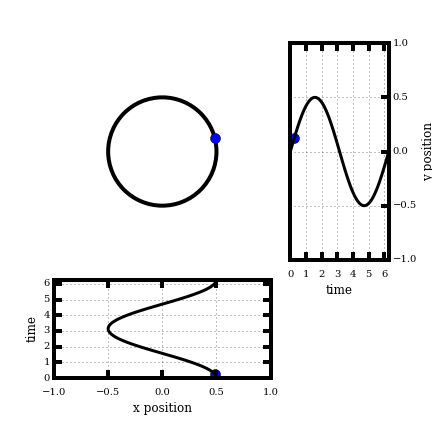
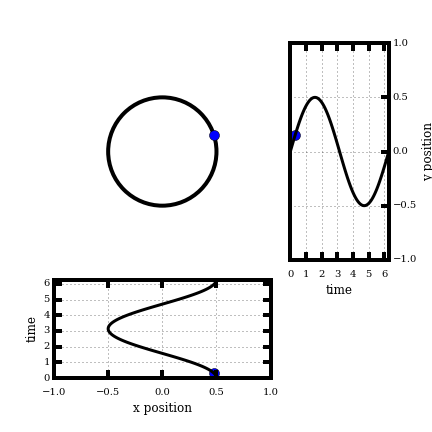
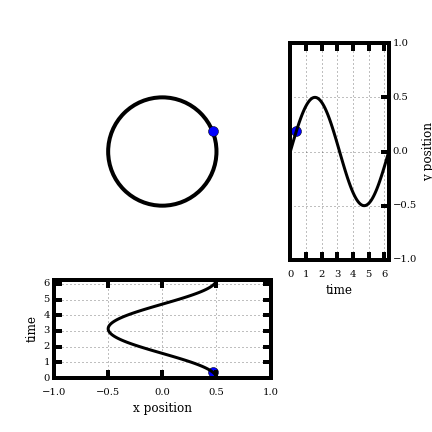
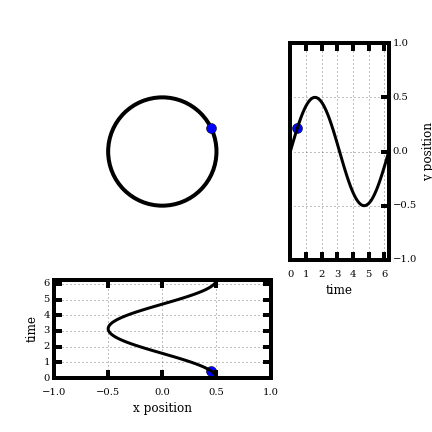
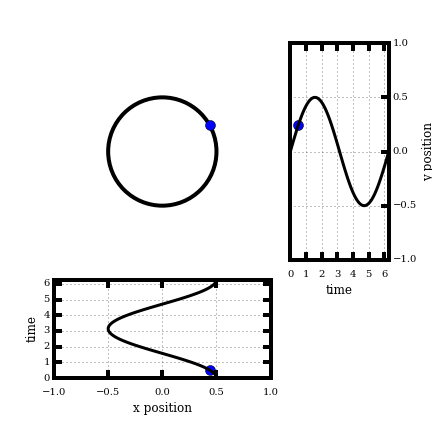
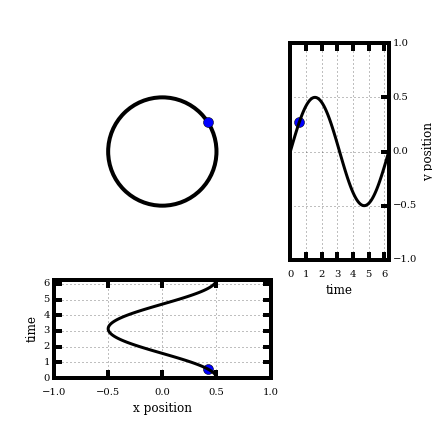
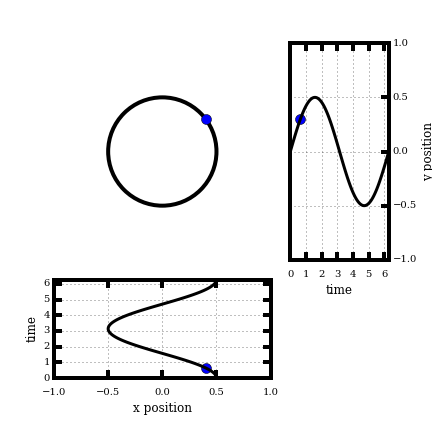
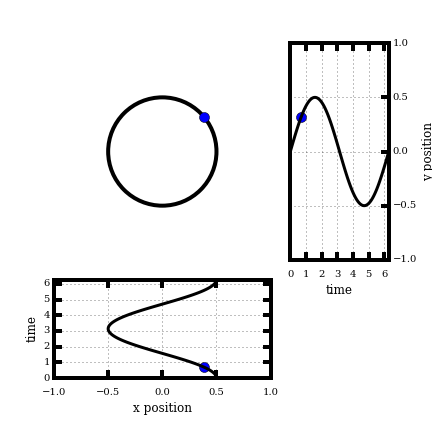
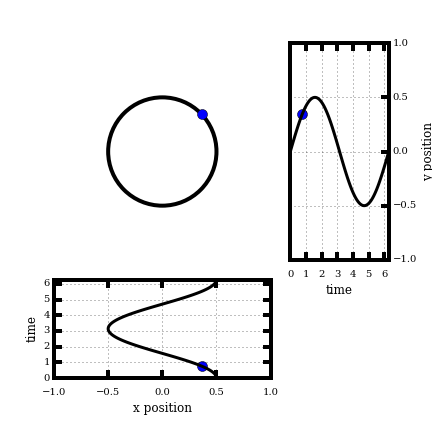
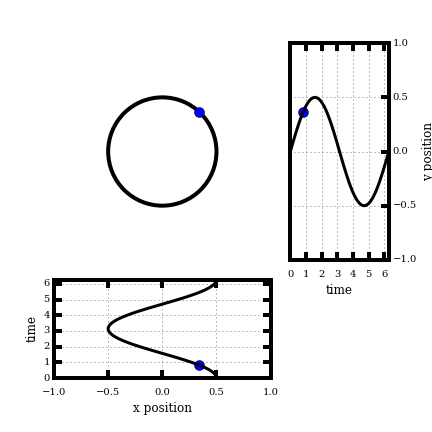
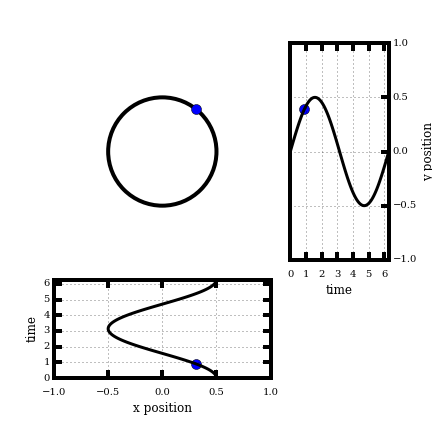
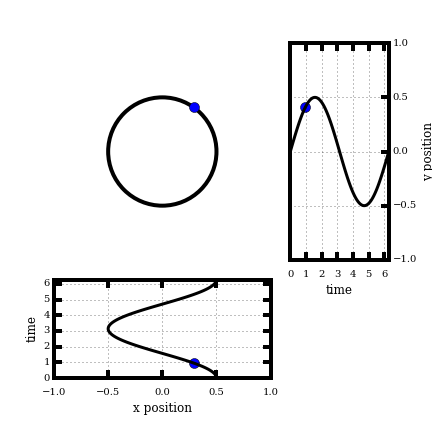
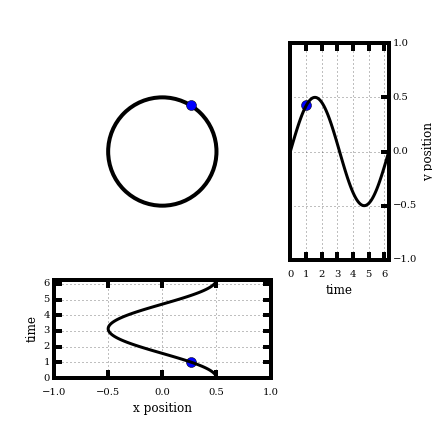
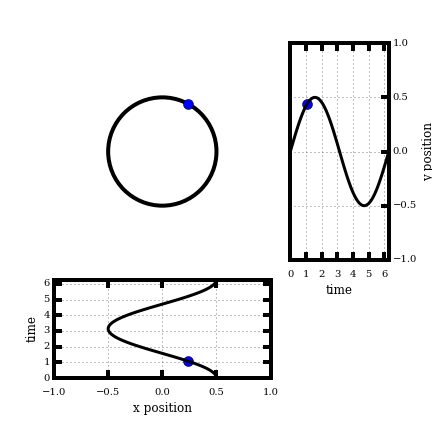
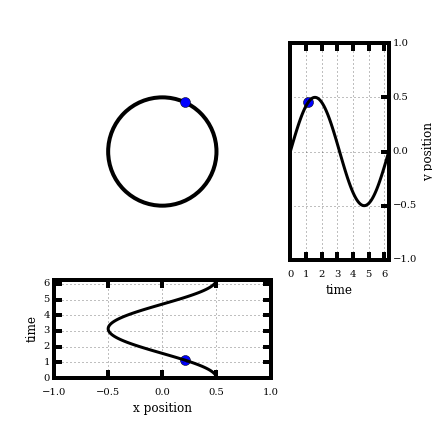
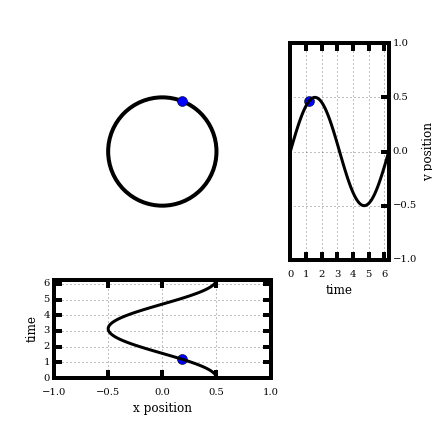
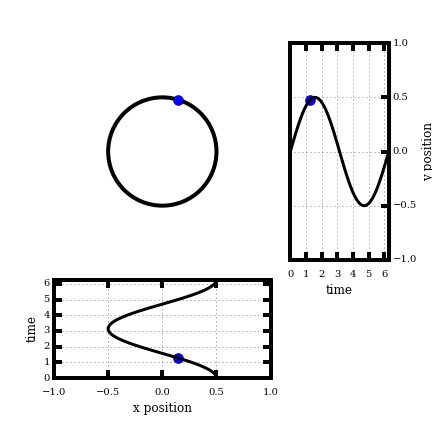
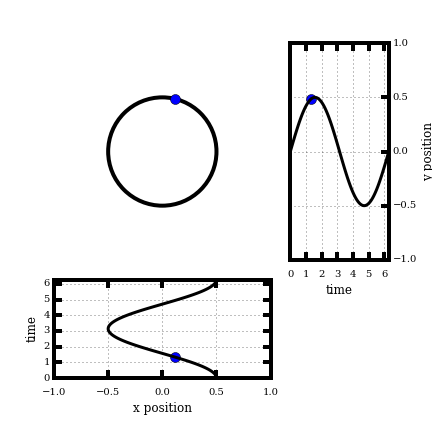
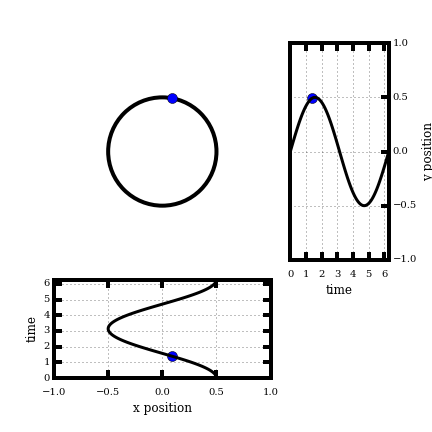
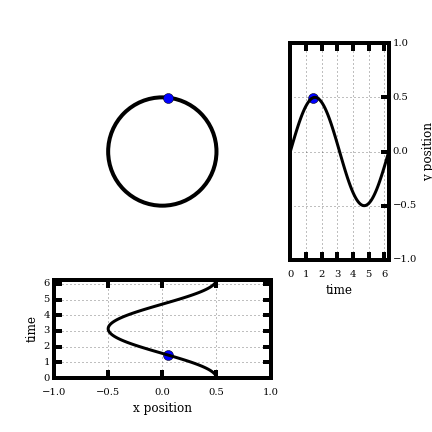
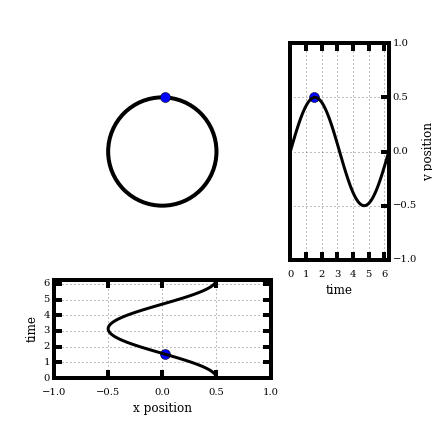
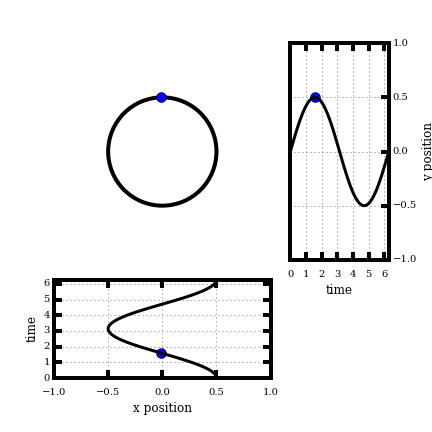
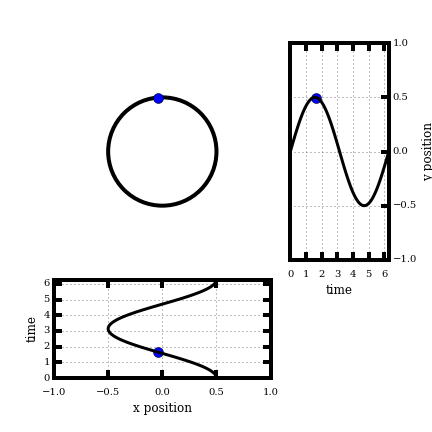
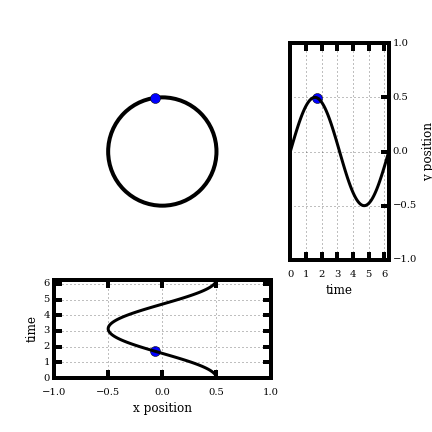
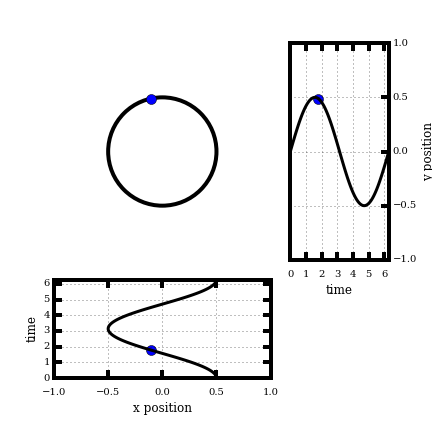
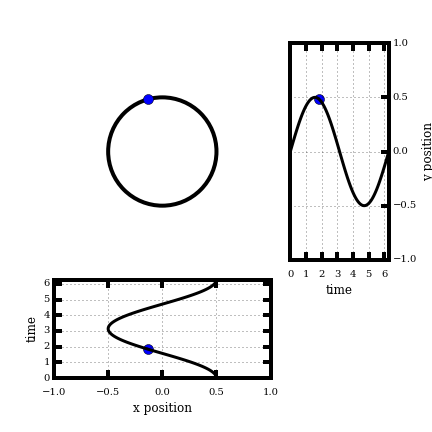
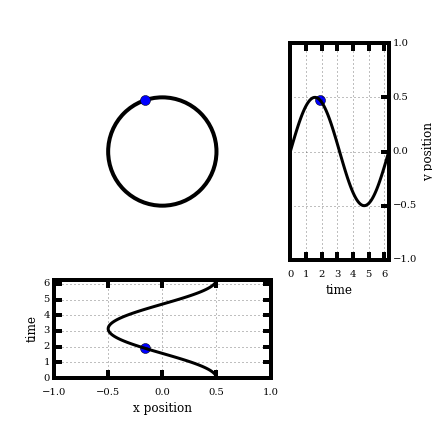
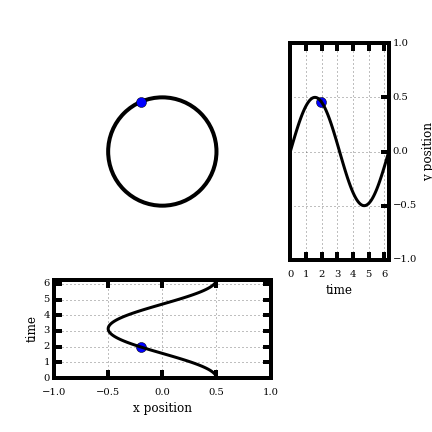
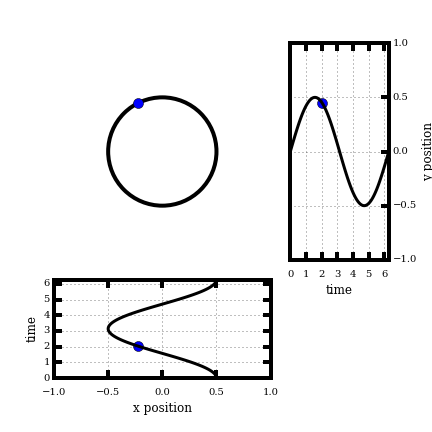
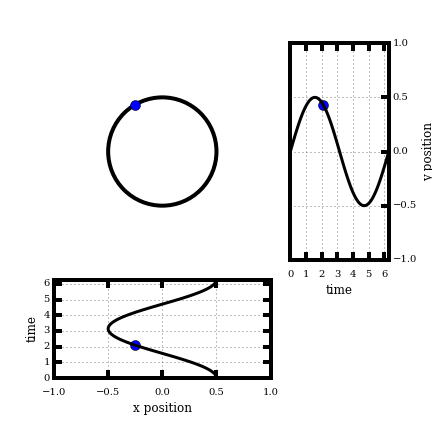
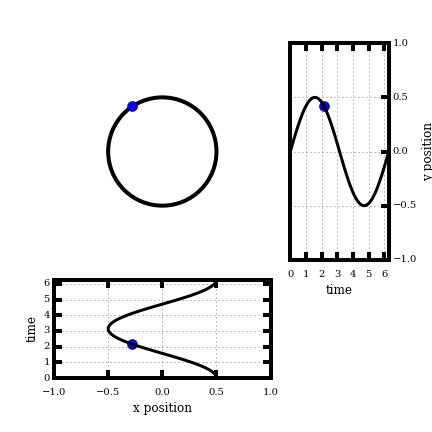
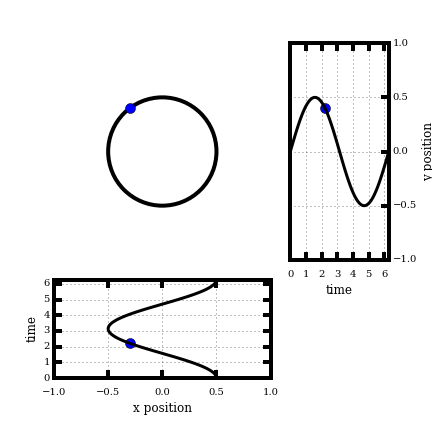
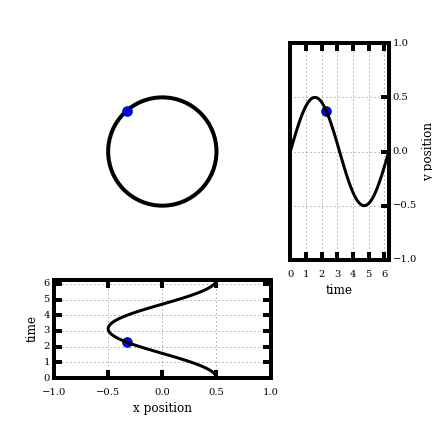
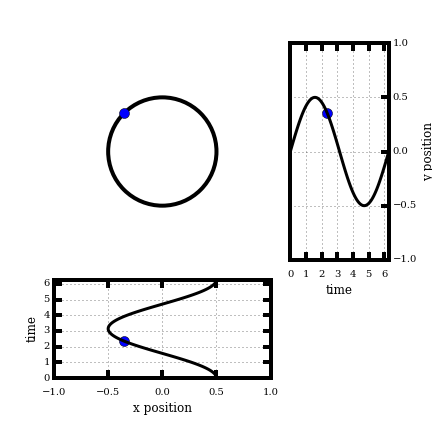
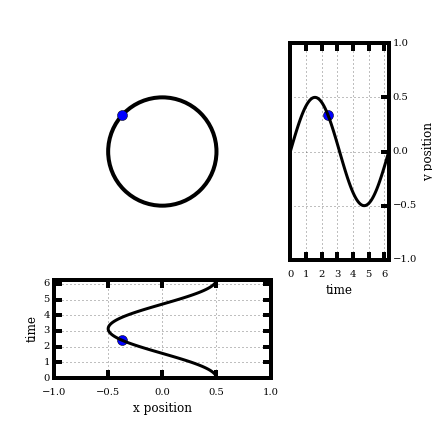
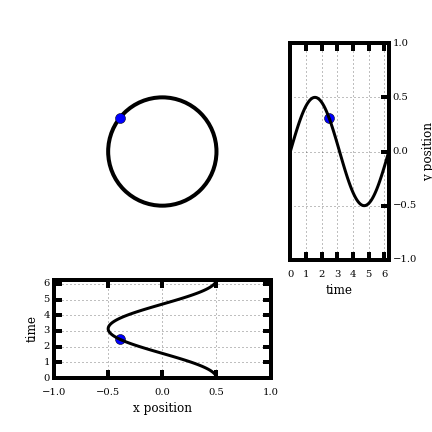
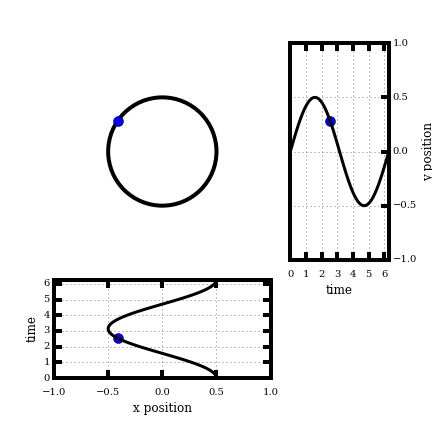
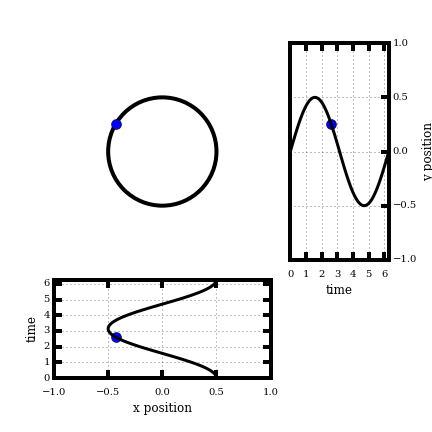
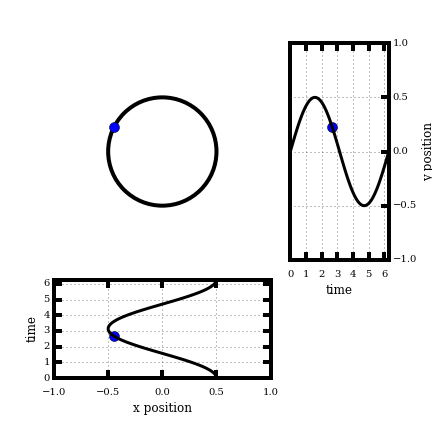
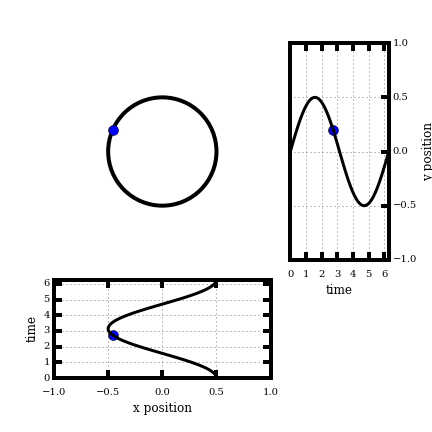
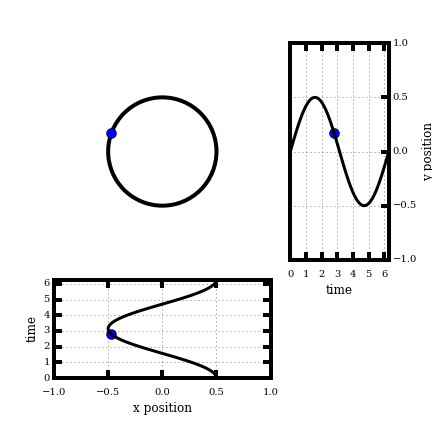
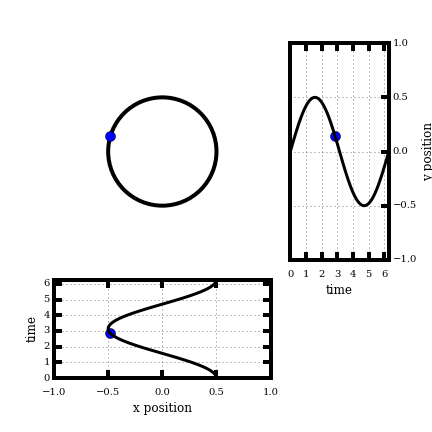
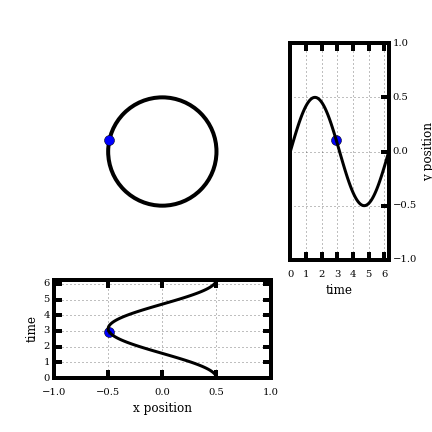
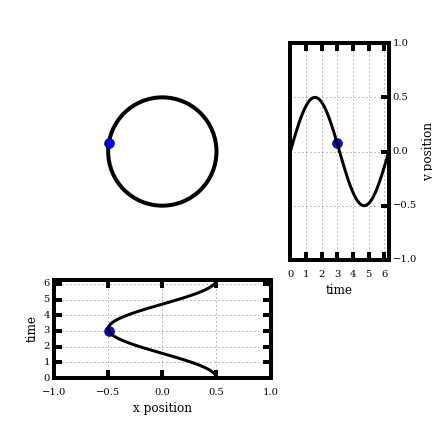
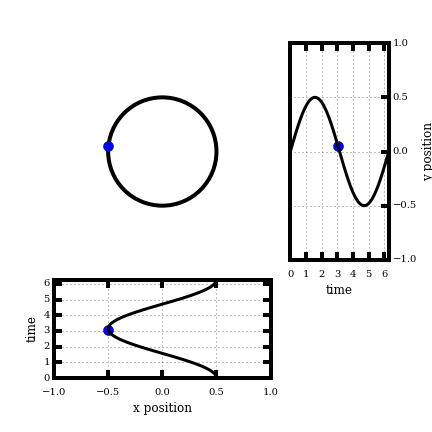
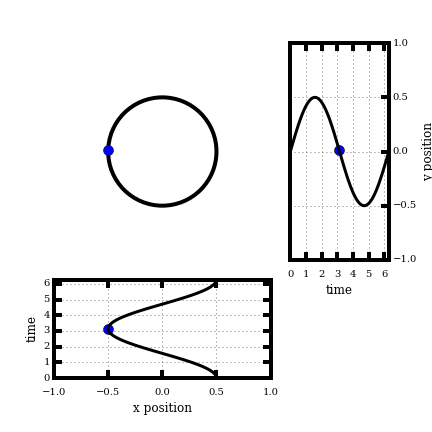
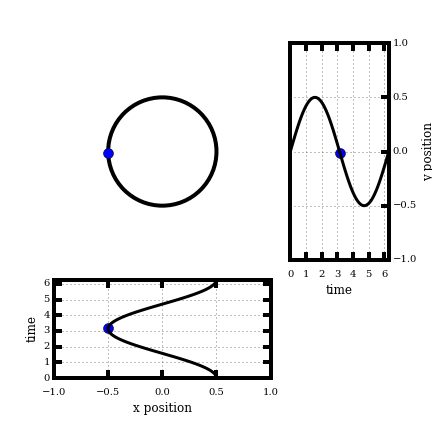
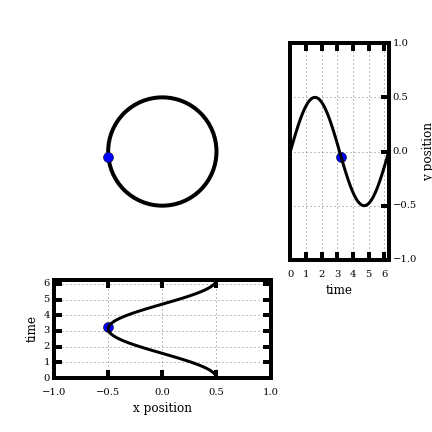
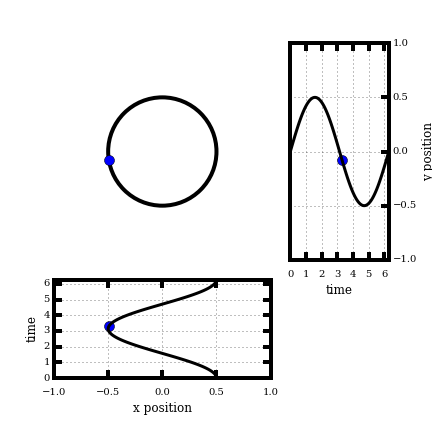
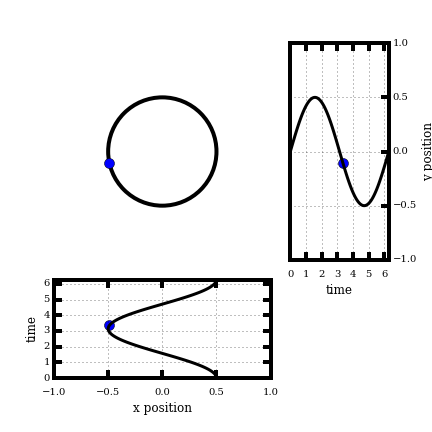
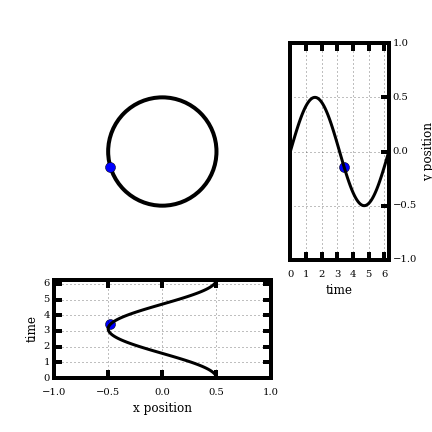
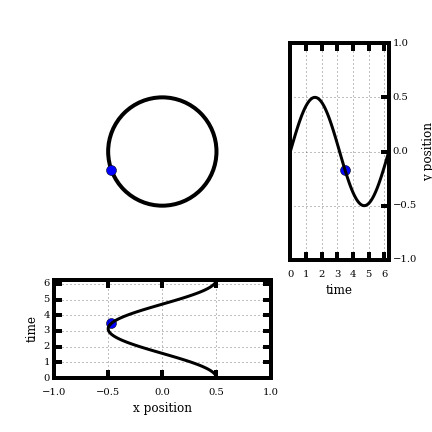
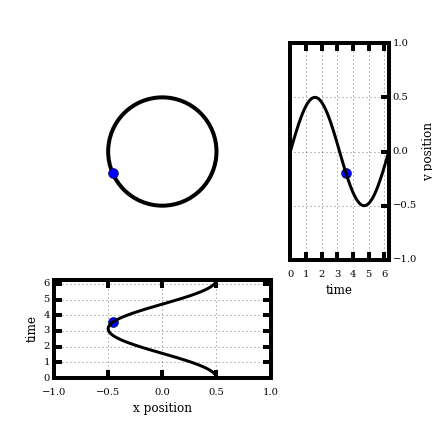
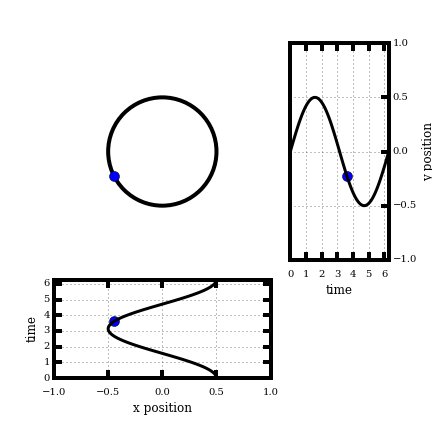
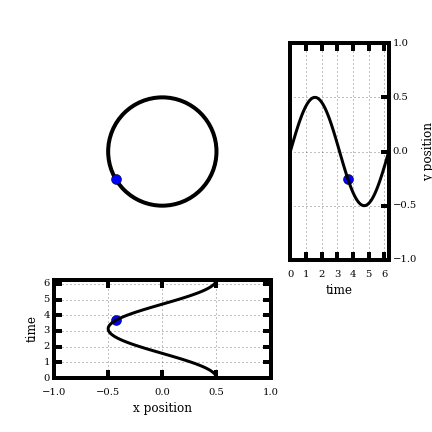
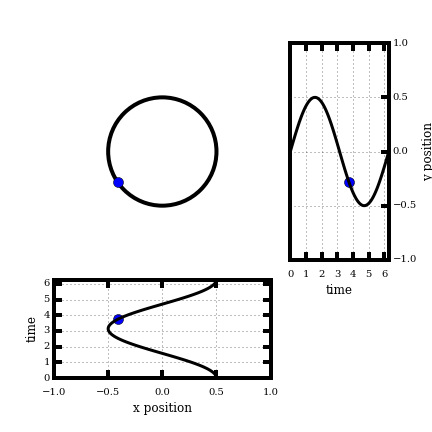
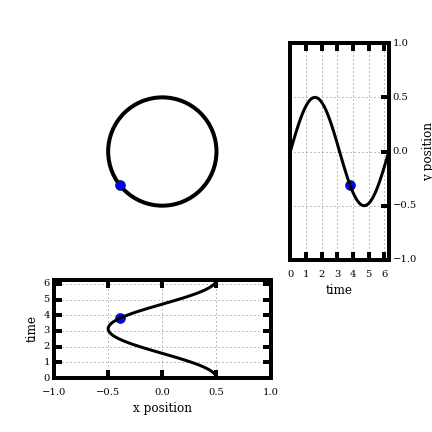
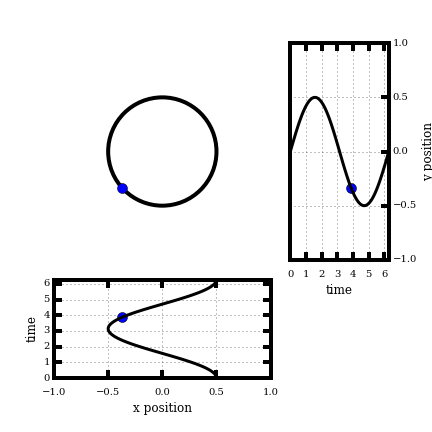
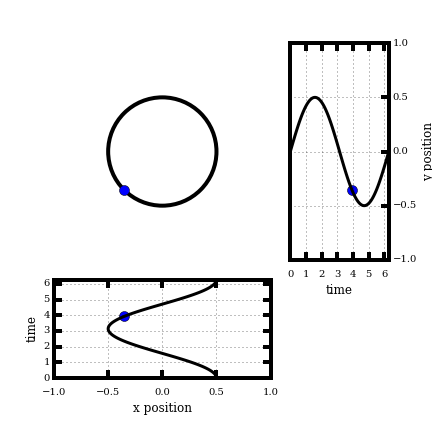
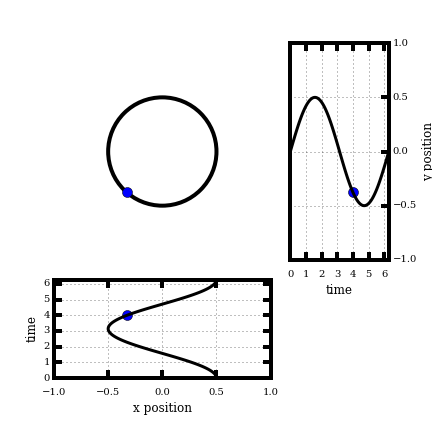
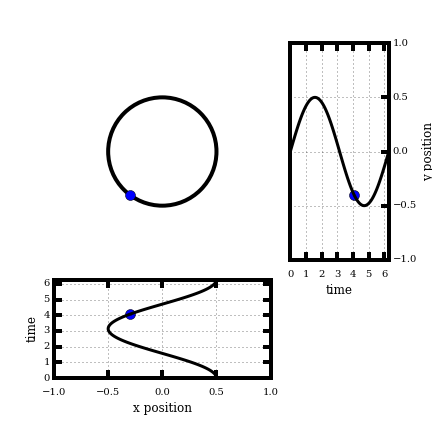
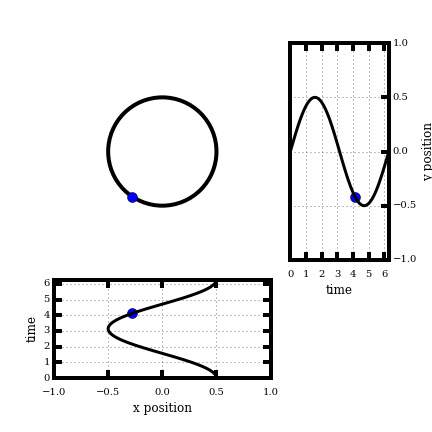
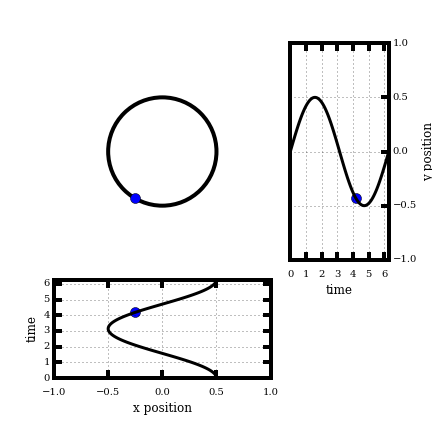
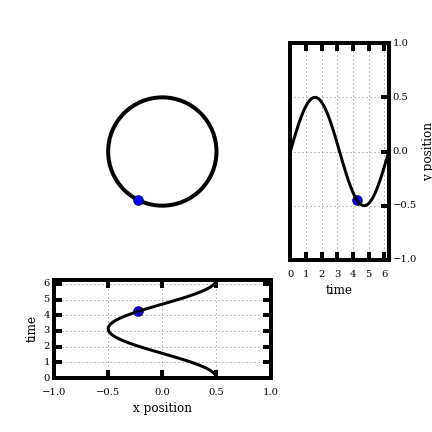
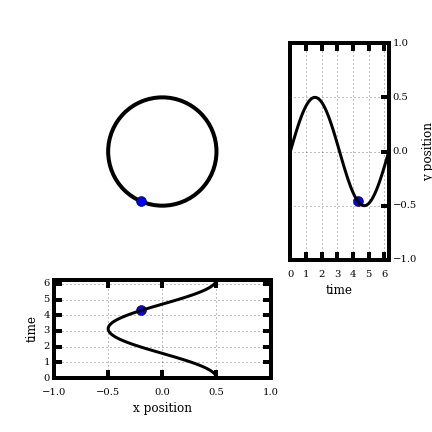
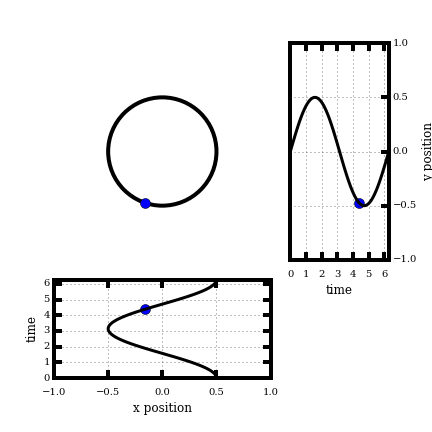
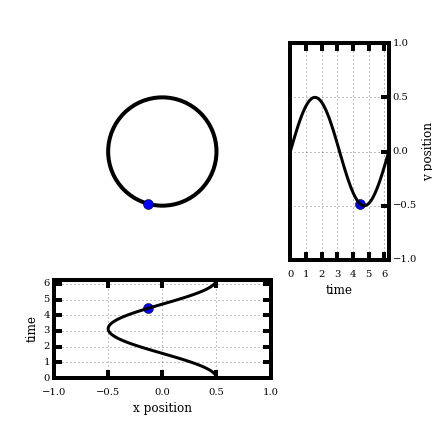
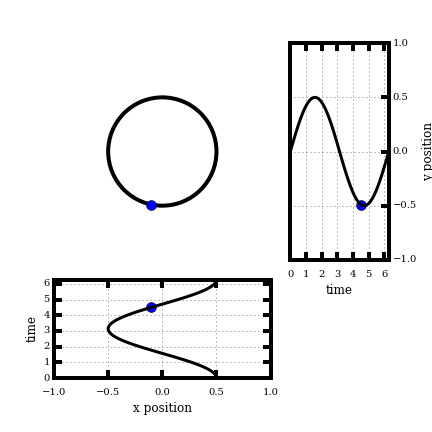
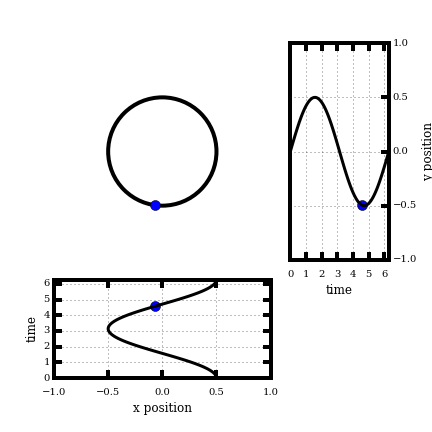
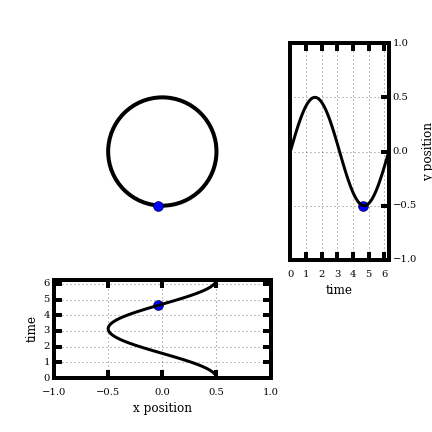
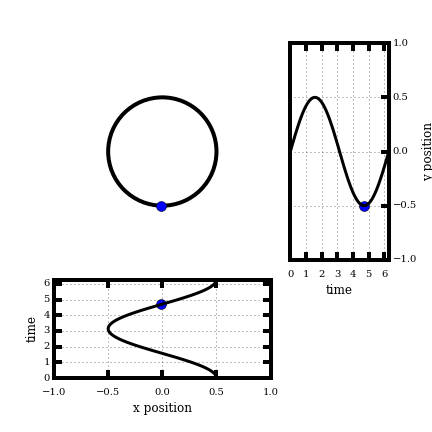
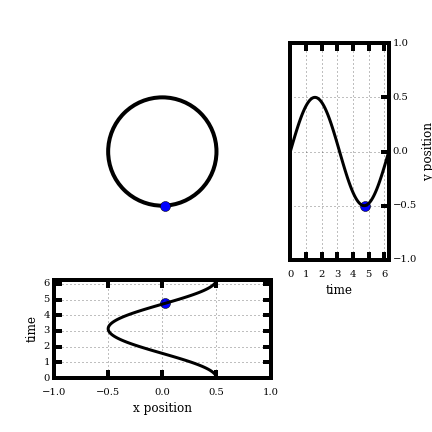
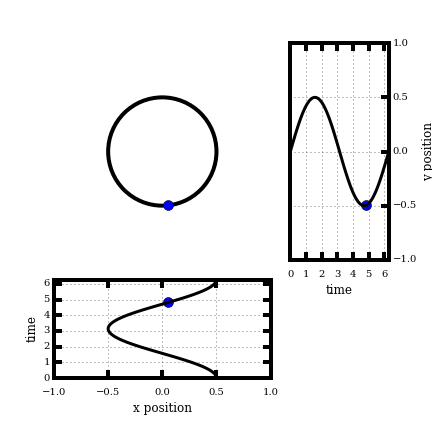
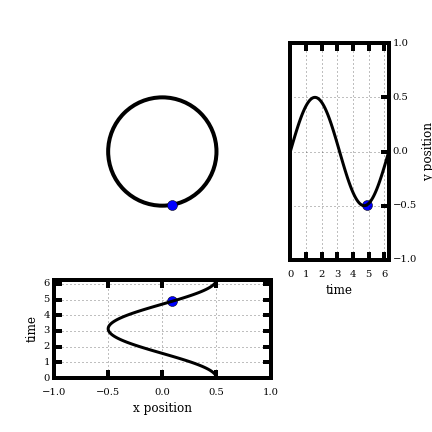
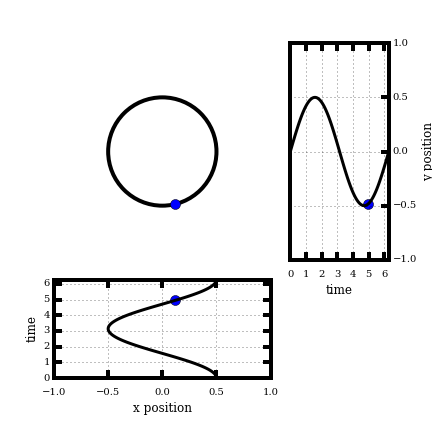
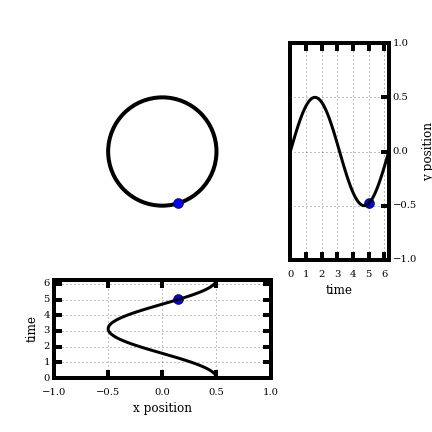
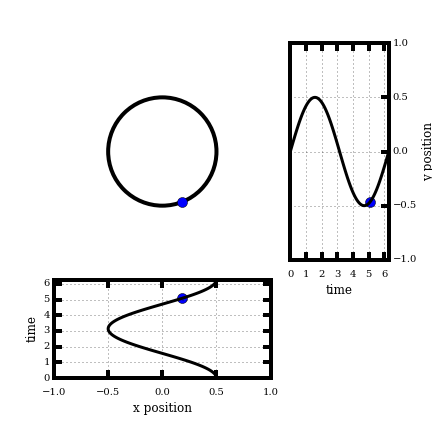
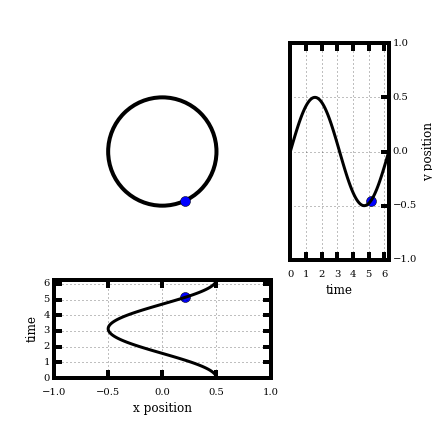
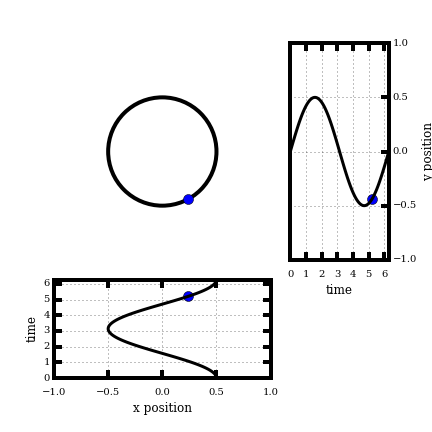
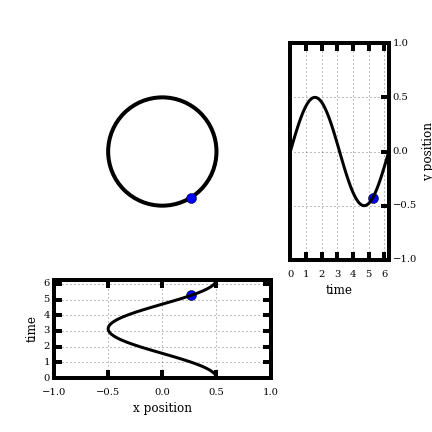
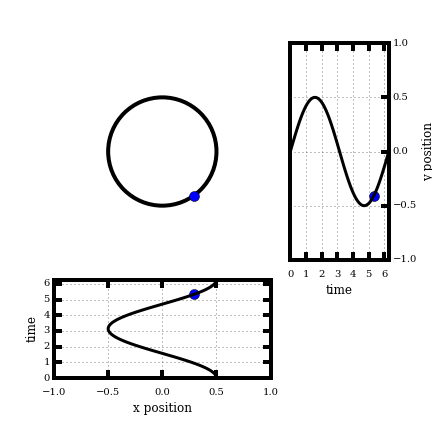
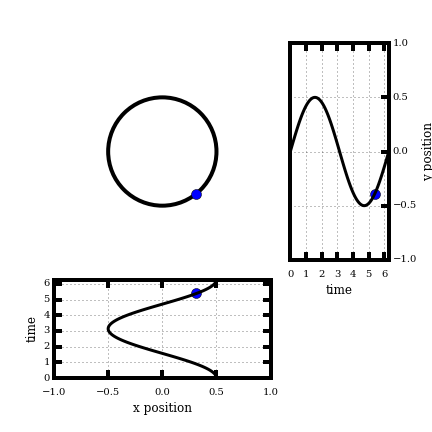
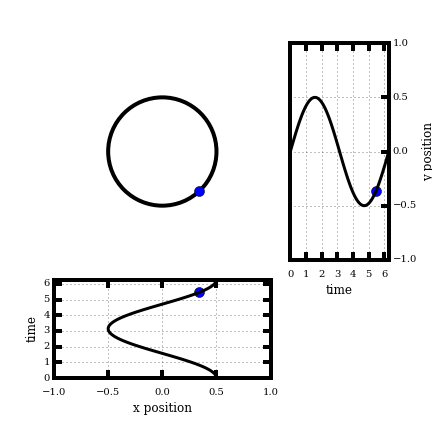
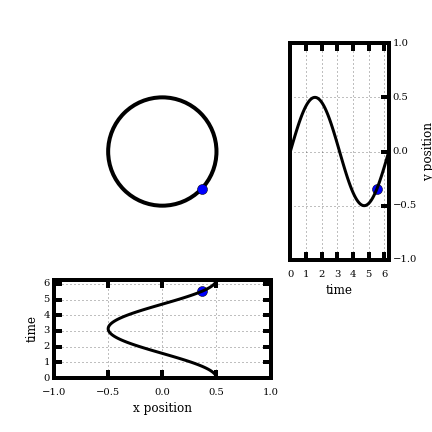
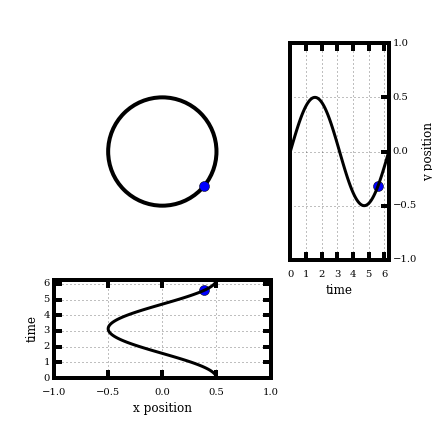
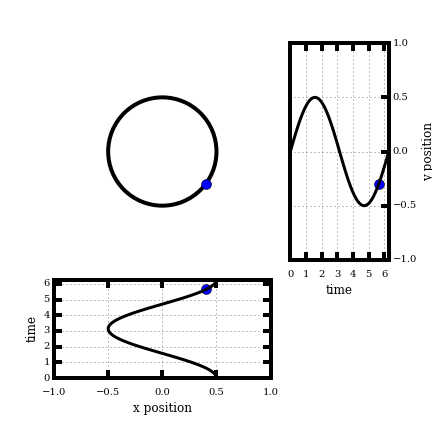
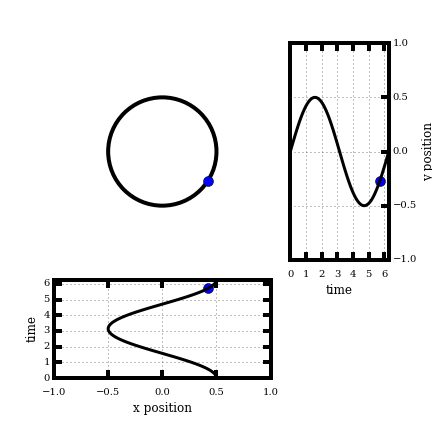
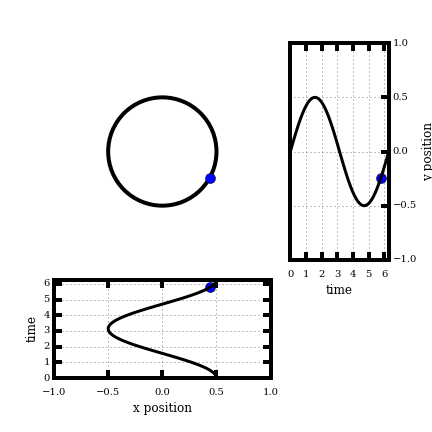
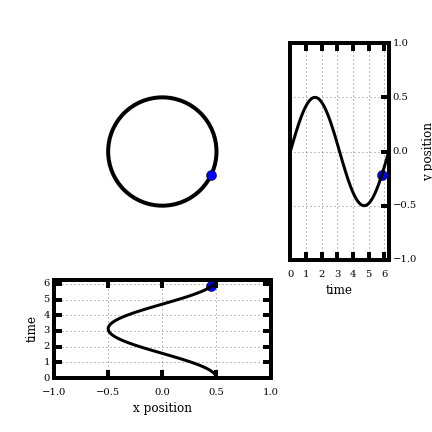
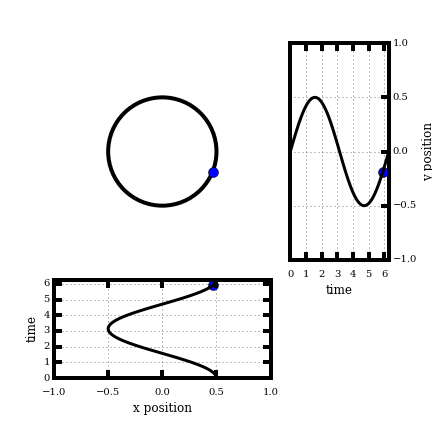
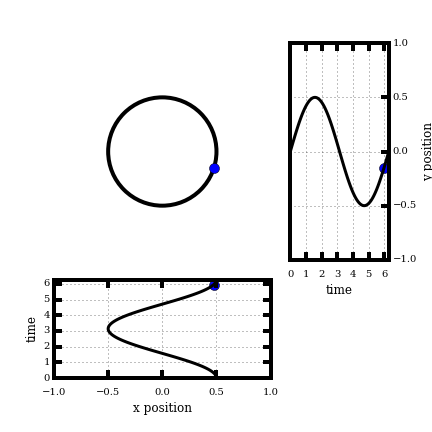
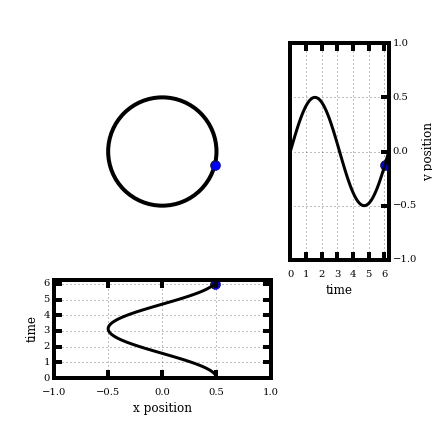
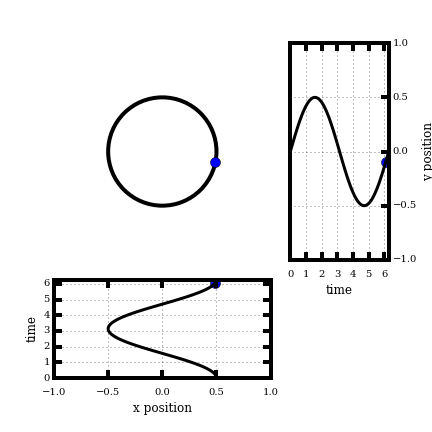
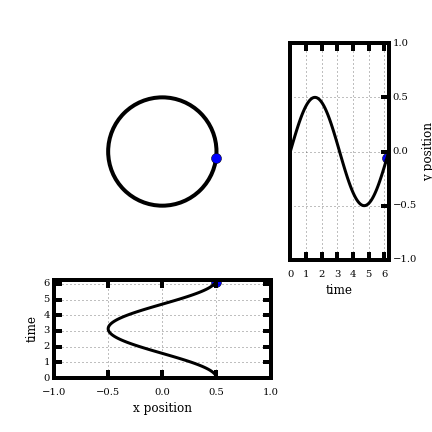
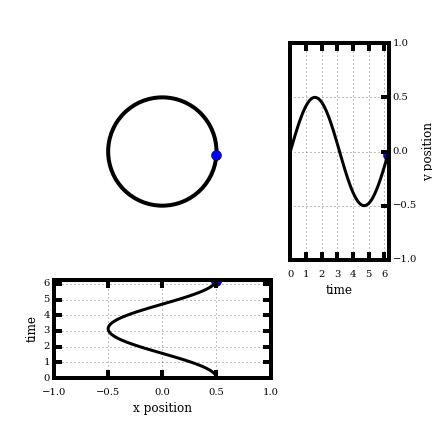
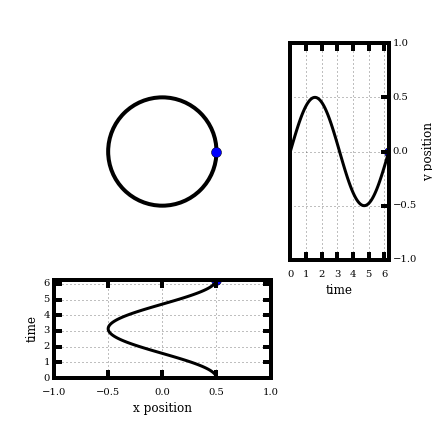

In [17]:
Nframes = 100
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(6,6))

rad = 0.5
# ax = fig.add_subplot(111, xlim=(-2.*rad, 2.*rad), ylim=(-2.*rad, 2.*rad), aspect='equal')
ax = plt.subplot2grid((3,3), (0,0), colspan=2, rowspan=2, 
                      xlim=(-2.*rad, 2.*rad), ylim=(-2.*rad, 2.*rad), aspect='equal')
circ = plt.Circle((0, 0), radius=rad, facecolor="None", edgecolor='k', lw=4)
ax.add_patch(circ)
ax.grid(False)
ax.axis('off')
circle, = ax.plot([], [], marker='o', ms=10)

#ax1 = fig.add_subplot(212, ylim=(0, 2.*np.pi), xlim=(-2.*rad, 2.*rad))
ax1 = plt.subplot2grid((3,3), (2,0), colspan=2, ylim=(0, 2.*np.pi), xlim=(-2.*rad, 2.*rad), sharex=ax)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.set_ylabel('time', fontsize=12)
ax1.set_xlabel('x position', fontsize=12)
x_pos_marker, = ax1.plot([], [], marker='o', ms=10, color='b')
x_pos_line, = ax1.plot([], [], color='k')

#ax2 = fig.add_subplot(122, xlim=(0, 2.*np.pi), ylim=(-2.*rad, 2.*rad))
ax2 = plt.subplot2grid((3,3), (0,2), rowspan=2, xlim=(0, 2.*np.pi), ylim=(-2.*rad, 2.*rad), sharey=ax)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.set_xlabel('time', fontsize=12)
ax2.set_ylabel('y position', fontsize=12)
y_pos_marker, = ax2.plot([], [], marker='o', ms=10, color='b')
y_pos_line, = ax2.plot([], [], color='k')

# initialization function: plot the background of each frame
def init():
    circle.set_data([], [])
    x_pos_marker.set_data([], [])
    y_pos_marker.set_data([], [])
    x_pos_line.set_data([], [])
    y_pos_line.set_data([], [])
    return circle, x_pos_marker, y_pos_marker, x_pos_line, y_pos_line

# This function moves the polygons as a function of the frame i
def animate(i):
    t = 2.*np.pi*float(i/(Nframes - 1.))
    x_marker = rad*np.cos(t)
    y_marker = rad*np.sin(t)
    circle.set_data(x_marker, y_marker)
    x_pos_marker.set_data(x_marker, t)
    y_pos_marker.set_data(t, y_marker)
    
    all_t = np.linspace(0, 2.*np.pi, Nframes)
    x = rad*np.cos(all_t)
    y = rad*np.sin(all_t)
    x_pos_line.set_data(x, all_t)
    y_pos_line.set_data(all_t, y)

    return circle, x_pos_marker, y_pos_marker, x_pos_line, y_pos_line
  
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=Nframes, interval=20, blit=True)

# call our new function to display the animation
display_animation(anim)

The velocity $\vec{v}$ is given by $\vec{v} = \dfrac{d\vec{r}}{dt} = -\hat{x}\ \omega R \sin(\omega t) + \hat{y}\ \omega R \cos(\omega t)$, and the acceleration $\vec{a} = \dfrac{d\vec{v}}{dt} = -\hat{x}\ \omega^2 R \cos(\omega t) - \hat{y}\ \omega^2 R \sin(\omega t)$. 

The magnitude of the acceleration is $|\vec{a}| = \sqrt{ \left[ -\hat{x}\ \omega^2 R \cos(\omega t) - \hat{y}\ \omega^2 R \sin(\omega t) \right] \bullet \left[ -\hat{x}\ \omega^2 R \cos(\omega t) - \hat{y}\ \omega^2 R \sin(\omega t) \right]} = \omega^2 R$.

Regarding the direction of the acceleration, we can see that, at some instant $t$, the x- and y-components of $\vec{a}$ have the same magnitudes relative to one another as the x- and y-components of $\vec{r}$ -- $x$ is $\cos$, and $y$ is $\sin$. However, the components $\vec{a}$ point in the opposite directions as the components of $\vec{r}$, $-\hat{x}$ and $-\hat{y}$. Therefore, $\vec{a}$ points radially inward toward the origin.

These results are totally consistent with uniform circular motion, for which the acceleration is constant in magnitude and points toward the center of the circle. 

## 1.19

Keep in mind that $\vec{v} = \dot{\vec{r}}$ and $\vec{a} = \dot{\vec{v}} = \ddot{\vec{r}}$.
$
\dfrac{d}{dt} \big[ \vec{a} \bullet \left( \vec{v} \times \vec{r} \right) \big] = \dot{\vec{a}} \bullet \left( \vec{v} \times \vec{r} \right) + \vec{a} \bullet \dfrac{d}{dt} \left( \vec{v} \times \vec{r} \right) = \dot{\vec{a}} \bullet \left( \vec{v} \times \vec{r} \right) + \vec{a} \bullet \left( \dot{\vec{v}} \times \vec{r} + \vec{v} \times \dot{\vec{r}} \right) = \dot{\vec{a}} \bullet \left( \vec{v} \times \vec{r} \right) + \vec{a} \bullet \left( \vec{a} \times \vec{r} + \vec{v} \times \vec{v} \right) = \\ \dot{\vec{a}} \bullet \left( \vec{v} \times \vec{r} \right) + \vec{a} \bullet \left( \vec{a} \times \vec{r} \right) + \vec{a} \bullet \left( \vec{v} \times \vec{v} \right).
$

In the very last expression, the first term is the answer we're looking for. The second term is zero because $\vec{a} \times \vec{r}$ produces a vector orthogonal to $\vec{a}$, and so the dot product with $\vec{a}$ is zero. The third term is zero because crossing a vector with itself always gives zero.

## 1.24

$\dfrac{df}{dt} = f(t)$, so $f(t) = ?$.

I'll use a different solution from the one suggested by the textbook just to give you an alternative approach.

$-f + \dfrac{df}{dt} = 0$; Multiply both sides by $e^{-t}$, an integrating factor. $\rightarrow -fe^{-t} + \dfrac{df}{dt}e^{-t} = 0$.

By the product rule, $-fe^{-t} + \dfrac{df}{dt}e^{-t} = \dfrac{d}{dt} \left( f e^{-t} \right) = 0$. 

So $f e^{-t} = k$, where $k$ is some constant. $\Rightarrow \boxed{f(t) = k e^t}$.<br><br>

Let's take the book's suggestion: $\dfrac{df}{dt} = f(t) \rightarrow \dfrac{df}{f} = dt$.

Integrating both sides: $\int \dfrac{df}{f} = \int dt \rightarrow \ln(f/f_0) = t$. Remember that $\ln(\ldots)$ is the natural log. 

Solving for $f$: $f(t) = f_0 e^t$, and we can see that the constant $f_0$ is the value of the function $f(t)$ when $t = 0$, same as the constant $k$.

## 1.41

From Eq. (1.48), the radial component of the force is $F_{\rm r} = m \left( \ddot{r} - r \dot{\phi}^2 \right) = -T$, with $T$ the tension in the string. The $\phi$ component is $F_{\rm \phi} = m \left( r \ddot{\phi} + 2 \dot{r} \dot{\phi} \right)$.

We know that $\ddot{\phi} = 0$ since the mass spins with constant angular velocity $\omega$. Thus, $\dot{\phi} = \omega = {\rm const.}$ The length of the string $R$ is also constant, so $\ddot{r} = \dot{r} = 0$.

So $F_{\rm r} = -m r \dot{\phi}^2 = -m R \omega^2 = -T \Rightarrow \boxed{ T = m R \omega^2 }$.

## 1.49

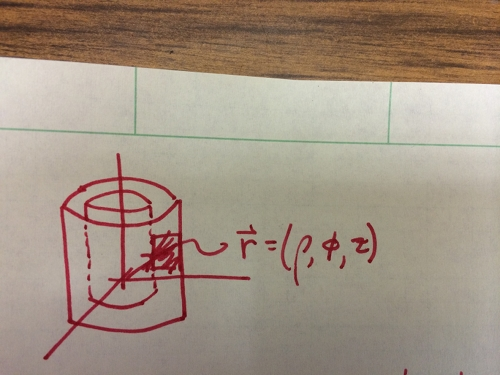

In [20]:
Image(filename='HW1_Fig1p49.jpg', width=300)

The figure above shows the puck at position $\vec{r}$ sandwiched between the two cylinders.

Cylindrical coordinates are just polar coordinates with one, uncoupled coordinate more, $z$, so the location of the puck's center of mass is $\vec{r} = (\rho, \phi, z)$. The direction and length of the unit vector pointing along $z$ don't change, i.e. $d\hat{z}/dt = 0$.

Again, using Eq (1.48),
$F_{\rm \rho} = m \left( \ddot{\rho} - \rho \dot{\phi}^2 \right)$. Because the puck is trapped in the radial direction, $\ddot{\rho} = \dot{\rho} = 0$. $\Rightarrow F_{\rm \rho} = -m \rho \dot{\phi}^2$, and this is the normal force exerted by the walls of the cylinders that keeps the puck confined.

$F_{\rm \phi} = m \left( \rho \ddot{\phi} - 2 \dot{\rho} \dot{\phi} \right) = m \rho \ddot{\phi} = 0$ since there are no net torques. Thus $m \rho \dot{\phi} = {\rm const.} = L \Rightarrow \dot{\phi} = L/m \rho \equiv \omega$. Plugging this expression into the $F_{\rm \rho}$ equation gives $F_{\rm \rho} = - m \rho \omega^2$.

Fortunately, since $z$ is uncoupled, the only thing happening in that direction is gravitational acceleration: $F_{\rm z} = -m g = m \ddot{z}$. 

Thus, <br>
$
z(t) = -\frac{1}{2} g t^2 + v_{\rm 0} t + z_{\rm 0}, \\
\rho(t) = R ,\\
\phi(t) = \omega t + \phi_{\rm 0}
$

If the initial velocity along $z$ were zero but $\omega$ were not, the puck would simply spiral downward between the cylinders.